### 📝 분류(Classification) 성능 평가 지표
<img src="./images/evaluation01.png" width=230 style="margin-left: 0">  

##### 정확도(Accuracy)
- 직관적으로 모델 예측 성능을 나타낼 수 있다.
- 2진 분류일 경우 데이터 구성에 따라 타겟 데이터 분포가 불균형할 경우 정확도 한 가지만으로는 적합한 성능 평가 지표가 될 수 없다.
- 강아지와 고양이 모두 무조건 생존으로 예측하는 모델이 있다고 가정한다.  
생존한 강아지 80마리와 사망한 고양이 20마리를 테스트하면, 정확도는 80%이다.  
이 모델을 사용하면 사망한 강아지 혹은 고양이를 절대 예측할 수 없다.
<img src="./images/accuracy01.png" width="400" style="margin: 20px">
##### 오차 행렬(Confusion Matrix)
- 학습된 분류 모델이 예측을 수행하면서 얼마나 예측에 오류가 있는지도 함께 보여주는 지표이다.
- 데이터가 한 곳으로 치우친 것도 확인할 수 있으며, TP, TN, FP, FN, 4가지로 구성되어 있다.
- 오차행렬로 분류 성능 평가 지표의 모든 것을 구할 수 있다(정확도, 정밀도, 재현율, F1 Score, ROC AUC).
<img src="./images/confusion_matrix01.png" width="600" style="margin:20px">
1. TN: 예측한 값은 0이고 실제 값 또한 0일 때
2. FP: 예측한 값은 1이지만 실제 값은 0일 때
3. FN: 예측한 값은 0이지만 실제 값은 1일 때
4. TP: 예측한 값은 1이고 실제 값 또한 1일 때
- 위 강아지와 고양이의 생존율 예측 모델의 오차 행렬은 다음과 같이 나온다.
<img src="./images/confusion_matrix02.png" width="600" style="margin:20px;">
- 100마리 전부 생존(음성, Negative)으로 예측했으며, 그 중 80마리는 실제 True이고, 나머지 20마리는 실제 False이기 때문이다.

- 보통 2진 분류일 경우 음성과 양성을 구분하는 의료학에서 많이 사용되며, 2가지 상황으로 나눌 수 있다.
> 1. 질병이나 이상이 없는데도 양성으로 오진하는 것을 방지하기 위해
>> - 특이도(Specificity): 정상을 정상으로 진단하는 비율(▲TN)
>> - 재현율(Recall)이 낮아지고 정밀도(Precision)가 높아질 수 있다.
> 2. 암 진단에서 양성인 환자를 놓치지 않고 최대한 많이 식별하기 위해
>> - 민감도(Sensitivity): 질병이 있는 사람을 질병이 있다고 진단하는 비율(▲TP)
>> - 재현율(Recall)이 높아지고 정밀도(Precision)가 낮아질 수 있다.
- 1의 경우 Positive보다는 Negative 예측 정확도를 높일 것이다. ▲TN 상승, ▼TP 하락. 또한 Positive로 예측하는 경우가 매우 작기 때문에, ▼FP 하락.  
- 2의 경우 Negative보다 Positive 예측 정확도를 높일 것이다, ▲TP 상승, ▼TN 하락, Negative로 예측하는 경우가 매우 작기 때문에, ▼FN 하락.

🚩결과적으로 정확한 판단이 아님에도 불구하고 정확도가 매우 높게 나타나는, 수치적인 판단 오류를 해결하기 위해서는 특이도(Specificity)와 민감도(Sensitivity)를 잘 조절해야 한다.
##### 정밀도(Precision)
- 예측을 Positive로 한 대상 중, 예측과 실제 값이 Positive로 일치한 데이터의 비율을 뜻한다.
- ▲TP, ▼FP일 경우 정밀도가 상승한다.
- precision_score()를 사용하여 정밀도를 구할 수 있다.

##### 재현율(Recall)
- 실제 값이 Positive인 대상 중, 얼마나 놓치지 않고 Positive로 예측했는 가의 비율을 뜻한다.
- ▲TP, ▼FN일 경우 재현율이 상승한다.
- recall_score()를 사용하여 재현율을 구할 수 있다.

##### 정밀도와 재현율의 트레이드 오프(Trade-off)
- 분류 시 결정 임계값(Threshold)을 조정해서 정밀도 또는 재현율의 수치를 높일 수 있다.  
📌임계값: 분류 시 양성 또는 음성을 판정할 때의 기준점(확률)이며, 임계값을 낮추면 Positive로 예측할 확률이 증가하며  
반대로, 임계값 수치를 올리면 Negative로 더 많이 예측하게 된다.
##### 가정: 구급대원 AI가 교통사고 현장에서 피해자를 병원으로 이송해야 할 지 판단해야 하는 시나리오.

- Dead(Positive): 피해자가 이미 사망했을 경우
- Alive(Negative): 피해자가 아직 살아있을 경우

>True Positive (TP): 모델이 Dead를 Dead로 올바르게 분류한 경우.  
<span style="color: #c85d53">False Positive (FP): 모델이 Alive를 Dead로 잘못 분류한 경우 (error I).</span>  
True Negative (TN): 모델이 Alive를 Alive로 올바르게 분류한 경우.  
<span style="color: #4aa4b4">False Negative (FN): 모델이 Dead를 Alive로 잘못 분류한 경우 (error II).</span>  
##### error I의 비용(FP)은 error II의 비용(FN)보다 훨씬 더 나쁘다! Alive로 예측해서 병원에 이송한 뒤 실제 Dead인 것이 낫다. FP ▼, error I ▼.
>정밀도 (Precision): 모델이 Dead로 예측한 환자 중에서 실제로 Dead인 환자의 비율을 나타낸다. 즉, 양성(Dead) 클래스로 예측한 결과 중 얼마나 많은 것이 진짜 양성(Dead)인지 측정한다.  
재현율 (Recall): 실제 Dead 피해자 중에서 모델이 Dead로 정확하게 예측한 피해자의 비율을 나타낸다. 즉, 모델이 얼마나 많은 Dead 피해자를 "놓치지 않고" 감지했는지 측정한다.
<img src="./images/threshold.png" width=500 style="margin:20px; margin-left: 0">
> - 🚩이는 정밀도를 높여야 하며, Threshold(임계값)을 높여서(오른쪽으로 이동) FP를 낮추고(정밀도 ▲), FN을 높여야 한다(재현율 ▼). 
> - 즉, Negative(Alive, 음성)로 예측할 확률이 높아져야 소중한 생명을 구할 확률이 높아지고, 이를 위해 임계값을 높여주는 것이다.

- 위의 시나리오처럼 한 쪽의 수치를 강제로 높이면 다른 한 쪽의 수치는 떨어지며, 이를 정밀도와 재현율의 "트레이드 오프"라고 한다.
- 임계치가 높아지면 정밀도가 높아진다. 반대로 임계치가 낮아지면 재현율이 높아진다.

##### F1 Score
- 이진 분류 모델의 성능을 평가하는 지표 중 하나이다.
- 정밀도(Precision)와 재현율(Recall)의 조화평균으로 계산되는 성능 측정 지표이다.  
- 정확도(Accuracy)와 같이 전체 성능에 대한 지표가 아닌 타겟 데이터(class)별 성능을 자세히 분석하는 평가 지표이다.
- 정밀도(Precision)와 재현율(Recall), 두 개의 평가 지표를 모두 고려하여 예측 성능을 평가하기 때문에 두 지표의 평균치를 구하는 조화 평균을 사용하여 조금 더 정확하게 모델의 예측 성능을 평가할 수 있다.
- 텍스트 분류, 정보 검색, 암 진단 등에서 사용되는 모델의 성능을 평가할 수 있다.
> 📌조화 평균
> - 보통 비율의 평균에서 많이 사용된다.
> - 산술 평균은 큰 데이터에 높은 가중치가 부여되고 기하 평균은 작은 데이터 요소에 낮은 가중치가 부여하는데 비해 조화평균은 전체적으로 동일한 가중치가 부여된다.  

<img src="./images/trade_off.png" width=600 style="margin-left: -30px">  
- F1 Score는 0 ~ 1까지 점수를 매길 수 있으며, 0에 가까울 수록 정밀도와 재현율 모두 낮다는 뜻이다.  

##### ROC Curve, AUC
- ROC(Receiver Operating Characteristic)는 수신기 동작 특성이라는 뜻이고, 이러한 이름이 붙은 이유는 2차 세계대전 때 무선 기기 성능 평가 때 사용되었기 때문이다.
- FPR이 변할 때 TPR이 어떻게 변하는지를 나타내는 곡선이며, FPR이 급격히 떨어지더라도 TPR은 천천히 떨어지는 것이 좋은 성능을 가진 모델로 판단한다.
<img src="./images/roc_auc.png" width=400 style="margin-left: -30px"> 
- AUC(Area Under the Curve)는 ROC 곡선 밑의 면적을 구한 것으로서, 일반적으로 1에 가까울 수록 좋은 수치이다.
- ROC Curve가 축에 붙을 수록(좌상단 모서리) 좋은 성능을 나타내는 것이며, 높이와 밑변이 1인 사각형으로 가정했을 경우 ROC Curve가 축에 붙을 수록(좌상단 모서리) AUC 면적이 넓어지며 1에 가까워진다.
- 모델이 양성과 음성을 얼마나 잘 분류하는지 시각화할 수 있다. 

#### 🚩정리
<strong>학습 데이터 정확도를 통해 F1 Score를 개선하고(보통 F1 Score가 0.7이상일 때 좋은 모델이라 간주) F1 Score의 단일값으로 알아낼 수 없는 오차 분포, FPR과 TPR의 상관도를 확인하고자 할 때에는 모델의 성능 평가를 보다 포괄적으로 진행할 수 있는 ROC Curve와 AUC 값을 사용한다. 성능 개선을 위해 훈련 데이터를 구체적으로 검토하고 모니터링하는 과정이 중요하며, 최종적인 모델의 완성도를 높이는 데에 있어서 평가를 소홀히 해서는 안된다.</strong>

##### 오차행렬, 정밀도, 재현율

In [18]:
from sklearn.metrics import accuracy_score, precision_score , recall_score , confusion_matrix, ConfusionMatrixDisplay

# 타겟 데이터와 예측 객체를 전달받는다.
def get_evaluation(y_test, prediction, classifier=None, X_test=None):
#     오차 행렬
    confusion = confusion_matrix(y_test, prediction)
#     정확도
    accuracy = accuracy_score(y_test , prediction)
#     정밀도
    precision = precision_score(y_test , prediction)
#     재현율
    recall = recall_score(y_test , prediction)

    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}'.format(accuracy , precision ,recall))
    print("#" * 50)
    
    if classifier is not None and  X_test is not None:
        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8,4))
        titles_options = [("Confusion matrix", None), ("Normalized confusion matrix", "true")]

        for (title, normalize), ax in zip(titles_options, axes.flatten()):
            disp = ConfusionMatrixDisplay.from_estimator(classifier, X_test, y_test, ax=ax, cmap=plt.cm.Blues, normalize=normalize)
            disp.ax_.set_title(title)
        plt.show()

### 피마 인디언 당뇨병 예측
- 이진 분류(Binary Classification)
##### Featuer
- Pregnancies : 임신 횟수
- Glucose : 경구 포도당 내성 시험에서 2시간 동안 혈장 포도당 농도
- BloodPressure : 혈압 (mm Hg)
- SkinThickness: 삼두근 피부 두께 (mm)
- Insulin: 2시간 혈청 인슐린 (mu U/ml)
- BMI: 체질량지수(kg/(height in m)<sup>2</sup>)
- DiabetesPedigreeFunction: 당뇨병 혈통 기능(유전)
- Age: 나이(만 나이)

##### Target(Label)
- Outcome: 클래스 변수 (0, 음성 또는 1, 양성) 268/768은 1이고 나머지는 0입니다

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

diabetes_df = pd.read_csv('./datasets/pima_indians_diabetes.csv')

print(diabetes_df['Outcome'].value_counts())
diabetes_df.info()

Outcome
0    500
1    268
Name: count, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


### 중복 행 검사

In [20]:
diabetes_df.duplicated().sum()

0

### 데이터 전처리
> 데이터 유형을 변환하거나 데이터 분석에 용이한 형태로 변환하는 작업을 통해,  
불필요한 컬럼 삭제, 열 병합 등을 통해 데이터를 정제하는 처리방식

- 수치가 0인 데이터를 처리한다.

In [21]:
diabetes_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


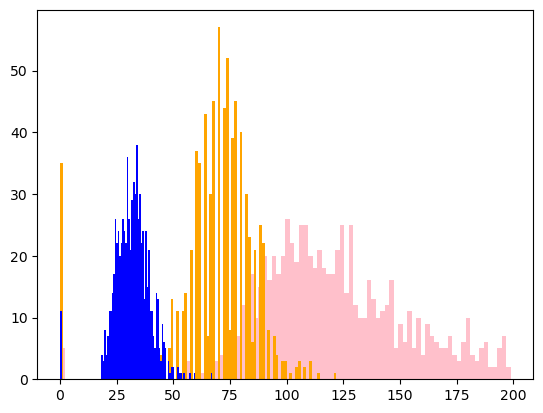

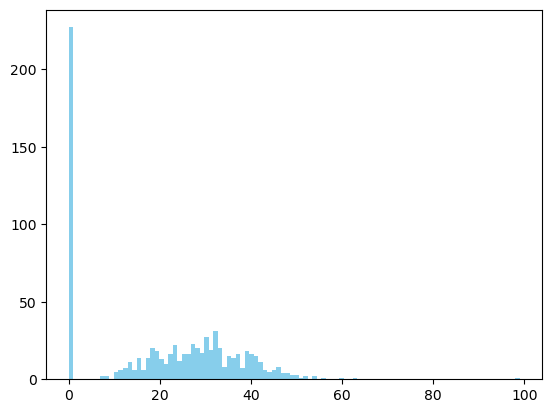

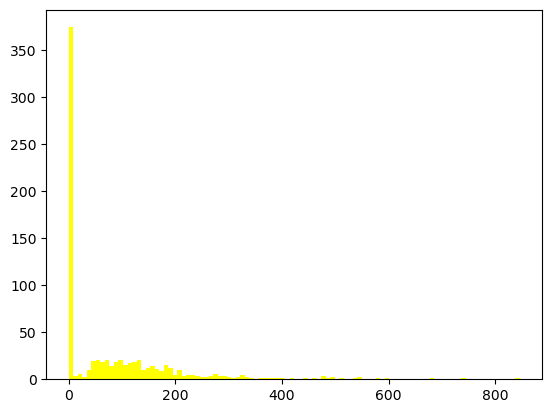

In [22]:
plt.hist(diabetes_df['Glucose'], bins=100, color='pink')
plt.hist(diabetes_df['BloodPressure'], bins=100, color='orange')
plt.hist(diabetes_df['BMI'], bins=100, color='blue')
plt.show()

plt.hist(diabetes_df['SkinThickness'], bins=100, color='skyblue')
plt.show()

plt.hist(diabetes_df['Insulin'], bins=100, color='yellow')
plt.show()

In [23]:
# 0 값을 검사할 feature명
zero_features = ['Glucose', 'BloodPressure','SkinThickness','Insulin','BMI']


# 전체 데이터 건수(행 개수)
total_count = diabetes_df['Glucose'].count()

for feature in zero_features:
    # 전체 데이터 건수
    
    zero_count = diabetes_df[diabetes_df[feature] == 0][feature].count()
    print(f'{feature}: {zero_count}건, {np.round(zero_count / total_count * 100, 4)}%')

Glucose: 5건, 0.651%
BloodPressure: 35건, 4.5573%
SkinThickness: 227건, 29.5573%
Insulin: 374건, 48.6979%
BMI: 11건, 1.4323%


##### 0 값을 모두 평균값으로 대체

In [24]:
diabetes_df[zero_features] = diabetes_df[zero_features].replace(0, diabetes_df[zero_features].mean())

# 0 값을 검사할 feature명
zero_features = ['Glucose', 'BloodPressure','SkinThickness','Insulin', 'BMI']


# 전체 데이터 건수(행 개수)
total_count = diabetes_df['Glucose'].count()

for feature in zero_features:
    # 전체 데이터 건수
    
    zero_count = diabetes_df[diabetes_df[feature] == 0][feature].count()
    print(f'{feature}: {zero_count}건, {np.round(zero_count / total_count * 100, 4)}%')

Glucose: 0건, 0.0%
BloodPressure: 0건, 0.0%
SkinThickness: 0건, 0.0%
Insulin: 0건, 0.0%
BMI: 0건, 0.0%


### 표준화와 정규화
##### 표준화(Standardization)
- 데이터의 분호를 정규 분포로 변경시켜준다(평균; 0, 표준 편차: 1).
- 다양한 기준으로 형성된 정규분포를 평균이 0 표준편차가 1인 하나의 기준으로 통합시켜 비교를 용이하게 하는 것이다.

##### 정규화(Normalize)
- 데이터의 범위 차이를 유지한 채 공통 척도로 변경하는 것이다.
- 필요한 feature에 대해서 같은 범위(0 ~ 1 또는 -1 ~ 1)를 가지게 할 때 사용한다.


#### 🚩표준화를 통해 이상치를 제거한 뒤 데이터를 정규화함으로써 상대적 크기에 대한 영향력을 줄인 다음 분석을 시작한다.

In [25]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

features, targets = diabetes_df.iloc[:, :-1], diabetes_df.Outcome

scaler = StandardScaler()

# 표준화
features_scaled = scaler.fit_transform(features)

# stratify: 데이터를 나눌 때 타겟 데이터 분호 비율에 맞춰서 나눠준다.
X_train, X_test, y_train, y_test = train_test_split(features_scaled, targets, test_size=0.2, stratify=targets, random_state=256)

# 결정 트리 분류
decision_tree_classifier = DecisionTreeClassifier()
parameters = {'max_depth': [5, 6, 7], 'min_samples_split': [7, 8, 9]}

# GridSearchCV 생성자는 훈련이 아니라 하이퍼 파라미터 튜닝이다.
grid_decision_tree = GridSearchCV(decision_tree_classifier, param_grid=parameters, cv=10, refit=True, return_train_score=True)

# 훈련 시 교차 검증으로 진행한다.
grid_decision_tree.fit(X_train, y_train)

print(f'GridSearchCV 최적 파라미터: {grid_decision_tree.best_params_}')
print(f'GridSearchCV 최고 정확도: {grid_decision_tree.best_score_}')

prediction = grid_decision_tree.predict(X_test)
print(f'테스트 데이터 세트 정확도: {accuracy_score(y_test, prediction)}')

scores_df = pd.DataFrame(grid_decision_tree.cv_results_)
scores_df[['params', 'mean_test_score', 'rank_test_score', 
           'split0_test_score', 'split1_test_score', 'split2_test_score']]

display(scores_df)

GridSearchCV 최적 파라미터: {'max_depth': 5, 'min_samples_split': 9}
GridSearchCV 최고 정확도: 0.7525118984664199
테스트 데이터 세트 정확도: 0.7597402597402597


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.002964,0.000595,0.000672,0.000448,5,7,"{'max_depth': 5, 'min_samples_split': 7}",0.725806,0.774194,0.741935,...,0.829710,0.836957,0.849910,0.826401,0.826401,0.831826,0.835443,0.833635,0.835869,0.008603
1,0.002707,0.000439,0.000598,0.000488,5,8,"{'max_depth': 5, 'min_samples_split': 8}",0.725806,0.774194,0.758065,...,0.829710,0.836957,0.849910,0.826401,0.826401,0.831826,0.835443,0.833635,0.835869,0.008603
2,0.002593,0.000487,0.000700,0.000458,5,9,"{'max_depth': 5, 'min_samples_split': 9}",0.725806,0.774194,0.741935,...,0.829710,0.836957,0.849910,0.826401,0.826401,0.830018,0.835443,0.833635,0.835688,0.008704
3,0.003207,0.000435,0.000498,0.000498,6,7,"{'max_depth': 6, 'min_samples_split': 7}",0.725806,0.725806,0.677419,...,0.864130,0.867754,0.875226,0.849910,0.844485,0.864376,0.864376,0.864376,0.864282,0.009684
4,0.003091,0.000297,0.000514,0.000517,6,8,"{'max_depth': 6, 'min_samples_split': 8}",0.725806,0.709677,0.693548,...,0.864130,0.867754,0.871609,0.849910,0.844485,0.864376,0.864376,0.864376,0.863558,0.008955
5,0.003242,0.000398,0.000500,0.000501,6,9,"{'max_depth': 6, 'min_samples_split': 9}",0.725806,0.725806,0.677419,...,0.864130,0.867754,0.871609,0.849910,0.844485,0.862568,0.864376,0.864376,0.863558,0.009095
6,0.003501,0.000489,0.000603,0.000492,7,7,"{'max_depth': 7, 'min_samples_split': 7}",0.741935,0.741935,0.661290,...,0.887681,0.878623,0.895118,0.867993,0.857143,0.893309,0.869801,0.904159,0.884912,0.015747
7,0.003292,0.000457,0.000597,0.000487,7,8,"{'max_depth': 7, 'min_samples_split': 8}",0.774194,0.741935,0.645161,...,0.887681,0.878623,0.891501,0.867993,0.857143,0.891501,0.869801,0.904159,0.884007,0.014495
8,0.003591,0.000489,0.000598,0.000488,7,9,"{'max_depth': 7, 'min_samples_split': 9}",0.741935,0.741935,0.661290,...,0.884058,0.876812,0.891501,0.867993,0.857143,0.877034,0.869801,0.904159,0.881836,0.014732


오차 행렬
[[74 26]
 [11 43]]
정확도: 0.7597, 정밀도: 0.6232, 재현율: 0.7963
##################################################


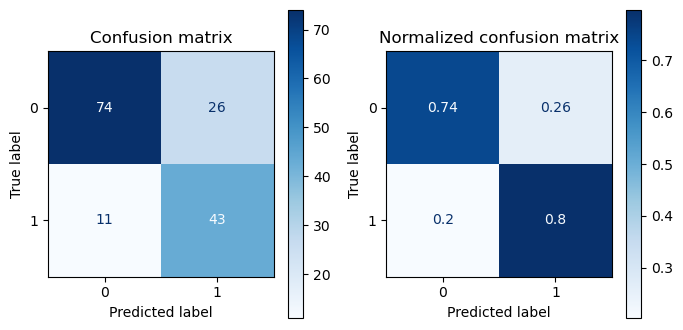

In [26]:
get_evaluation(y_test, prediction, classifier=grid_decision_tree, X_test=X_test)

### Precision/Recall Trade-off
##### predict_proba(test features)
- 정밀도(precision), 재현율(recall)의 수치를 각각 나타낼 수 있다.

In [27]:
# prediction이 0일 때와 1일 때의 확률을 가져온다.
prediction_proba = grid_decision_tree.predict_proba(X_test)
print(prediction_proba.shape, prediction.shape)

print("# 확률이 더 큰 값을 예측값으로 사용한다.")
print("#" * 50)
print("[0일 때의 확률, 1일 때의 확률], 예측값")
print("#" * 50)
for proba, predict in zip(prediction_proba.tolist()[:5], prediction.tolist()[:5]):
    print(proba, predict)

(154, 2) (154,)
# 확률이 더 큰 값을 예측값으로 사용한다.
##################################################
[0일 때의 확률, 1일 때의 확률], 예측값
##################################################
[0.0, 1.0] 1
[0.4025974025974026, 0.5974025974025974] 1
[0.8918918918918919, 0.10810810810810811] 0
[1.0, 0.0] 0
[0.17142857142857143, 0.8285714285714286] 1


### Threshold(임계)값과 기준값의 비교
##### Binarizer(threshold)
- 전달한 기준값보다 같거나 작으면 0, 보다 크면 1을 리턴한다.
- predict_proba()의 원리를 이해하자.

In [28]:
from sklearn.preprocessing import Binarizer

proba = [[ 0.4, 0.7,  0.9],
     [ 0.2,  0,  0.3],
     [ 0.5,  0.6, 1]]

binarizer = Binarizer(threshold=0.3)
print(binarizer.fit_transform(proba))

[[1. 1. 1.]
 [0. 0. 0.]
 [1. 1. 1.]]


In [29]:
from sklearn.preprocessing import Binarizer

# 임계값을 0.5로 설정
threshold = 0.5

custome_proba = prediction_proba[:, 1].reshape(-1, 1)
print(custome_proba)

binarizer = Binarizer(threshold=threshold).fit(custome_proba)
custom_prediction = binarizer.transform(custome_proba)

get_evaluation(y_test, custom_prediction)

[[1.        ]
 [0.5974026 ]
 [0.10810811]
 [0.        ]
 [0.82857143]
 [0.5974026 ]
 [0.92537313]
 [0.52941176]
 [0.        ]
 [0.1372549 ]
 [0.1372549 ]
 [0.5974026 ]
 [0.82857143]
 [0.07142857]
 [0.1372549 ]
 [0.24137931]
 [0.        ]
 [0.24137931]
 [0.92537313]
 [0.52941176]
 [0.1372549 ]
 [0.5974026 ]
 [0.5974026 ]
 [0.82857143]
 [0.1372549 ]
 [0.92537313]
 [0.5974026 ]
 [0.5974026 ]
 [0.        ]
 [0.1372549 ]
 [0.07142857]
 [0.5974026 ]
 [0.66666667]
 [0.10810811]
 [0.24137931]
 [0.        ]
 [0.52941176]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.82857143]
 [0.1       ]
 [0.5974026 ]
 [0.92537313]
 [0.66666667]
 [0.92537313]
 [0.92537313]
 [0.5974026 ]
 [0.24137931]
 [0.52941176]
 [0.24137931]
 [0.        ]
 [0.5974026 ]
 [0.92537313]
 [0.92537313]
 [0.        ]
 [0.5974026 ]
 [0.24137931]
 [0.82857143]
 [0.        ]
 [0.82857143]
 [0.5974026 ]
 [0.5974026 ]
 [0.        ]
 [0.92537313]
 [0.        ]
 [0.1372549 ]
 [0.        ]
 [0.        ]
 [0.10810811]
 [0.82857143]
 [0.13

In [30]:
from sklearn.metrics import accuracy_score, precision_score , recall_score , confusion_matrix, ConfusionMatrixDisplay

thresholds = [0.4, 0.45, 0.5, 0.55, 0.6]

# 타겟 데이터와 예측 객체를 전달받는다.
def get_evaluation_by_thresholds(y_test, prediction_proba_class1, thresholds):
    
    for threshold in thresholds:
        binarizer = Binarizer(threshold=threshold).fit(prediction_proba_class1) 
        custom_prediction = binarizer.transform(prediction_proba_class1)
        print('임곗값:', threshold)
        get_evaluation(y_test, custom_prediction)
    
get_evaluation_by_thresholds(y_test, prediction_proba[:,1].reshape(-1,1), thresholds)

임곗값: 0.4
오차 행렬
[[74 26]
 [11 43]]
정확도: 0.7597, 정밀도: 0.6232, 재현율: 0.7963
##################################################
임곗값: 0.45
오차 행렬
[[74 26]
 [11 43]]
정확도: 0.7597, 정밀도: 0.6232, 재현율: 0.7963
##################################################
임곗값: 0.5
오차 행렬
[[74 26]
 [11 43]]
정확도: 0.7597, 정밀도: 0.6232, 재현율: 0.7963
##################################################
임곗값: 0.55
오차 행렬
[[78 22]
 [14 40]]
정확도: 0.7662, 정밀도: 0.6452, 재현율: 0.7407
##################################################
임곗값: 0.6
오차 행렬
[[88 12]
 [26 28]]
정확도: 0.7532, 정밀도: 0.7000, 재현율: 0.5185
##################################################


##### 임계값에 따른 정밀도, 재현율을 한 번에 확인한다.
- precision_recall_curve(test targets, positive rating)
- 정밀도, 재현율, 임계값 순으로 리턴한다.

In [31]:
from sklearn.metrics import precision_recall_curve

# 타겟 데이터가 1일 때의 예측 확률 추출 
prediction_proba_class1 = grid_decision_tree.predict_proba(X_test)[:, 1] 

# 실제 데이터 세트와 타겟 데이터가 1일 때의 예측 확률을 precision_recall_curve에 전달 
precisions, recalls, thresholds = precision_recall_curve(y_test, prediction_proba_class1)

print('# thresholds', np.round(thresholds[:5], 2), sep="\n")
print('# precisions:', np.round(precisions[:5], 2), sep="\n")
print('# recalls:', np.round(recalls[:5], 2), sep="\n")

# thresholds
[0.   0.07 0.1  0.11 0.14]
# precisions:
[0.35 0.44 0.45 0.45 0.48]
# recalls:
[1.   0.94 0.94 0.91 0.89]


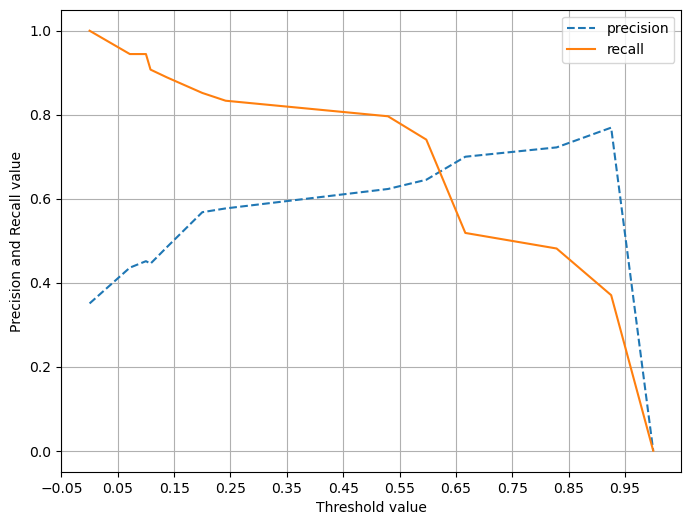

In [32]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

def precision_recall_curve_plot(y_test , prediction_proba_class1):

    precisions, recalls, thresholds = precision_recall_curve(y_test, prediction_proba_class1)
    
    # X축: threshold
    # Y축: 정밀도, 재현율 
    # 정밀도는 점선으로 표시
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary],label='recall')
    
    # X축(threshold)의 Scale을 0 ~ 1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    
    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
    plt.legend()
    plt.grid()
    plt.show()
    
precision_recall_curve_plot(y_test, grid_decision_tree.predict_proba(X_test)[:, 1] )


### 정밀도와 재현율의 문제점
- 정밀도를 100%로 만드려면, 확실한 기준이 있을 때에만 Positive로 예측하고 나머지는 모두 Negative로 예측한다. FP: 0, TP: 1
- 재현율을 100%로 만드려면, 모두 Positive로 예측하면 된다. FN: 0, TP: 1 
- 위와 같이 제작할 수 없기 때문에 정밀도와 재현율을 한 쪽으로 치우치지 않도록 해야 하며, 이를 수치로 나타낸 것이 F1 Score이다.

### F1 Score
##### f1_score(test targets, prediction)
- 정답과 예측값을 전달하여 F1 스코어를 알아낼 수 있다.

In [33]:
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

features, targets = diabetes_df.iloc[:, :-1], diabetes_df.Outcome

scaler = StandardScaler()

features_scaled = scaler.fit_transform(features)

# stratify: 데이터를 나눌 때 타겟 데이터 분호 비율에 맞춰서 나눠준다.
X_train, X_test, y_train, y_test = train_test_split(features_scaled, targets, test_size=0.2, stratify=targets, random_state=256)

# 결정 트리 분류
decision_tree_classifier = DecisionTreeClassifier()
parameters = {'max_depth': [5, 6, 7], 'min_samples_split': [7, 8, 9]}

# GridSearchCV 생성자는 훈련이 아니라 하이퍼 파라미터 튜닝이다.
grid_decision_tree = GridSearchCV(decision_tree_classifier, param_grid=parameters, cv=10, refit=True, return_train_score=True)

# 훈련 시 교차 검증으로 진행한다.
grid_decision_tree.fit(X_train, y_train)

prediction = grid_decision_tree.predict(X_test)

f1 = f1_score(y_test, prediction)

print(f'F1 스코어: {np.round(f1, 4)}')

# 타겟 데이터가 1일 때의 예측 확률 추출 
prediction_proba_class1 = grid_decision_tree.predict_proba(X_test)[:, 1] 

# 실제 데이터 세트와 타겟 데이터가 1일 때의 예측 확률을 precision_recall_curve에 전달 
precisions, recalls, thresholds = precision_recall_curve(y_test, prediction_proba_class1)

F1 스코어: 0.6992


In [34]:
from sklearn.metrics import accuracy_score, precision_score , recall_score , confusion_matrix, ConfusionMatrixDisplay, f1_score

# 타겟 데이터와 예측 객체를 전달받는다.
def get_evaluation(y_test, prediction, classifier=None, X_test=None):
#     오차 행렬
    confusion = confusion_matrix(y_test, prediction)
#     정확도
    accuracy = accuracy_score(y_test , prediction)
#     정밀도
    precision = precision_score(y_test , prediction)
#     재현율
    recall = recall_score(y_test , prediction)
#     F1 score
    f1 = f1_score(y_test, prediction)

    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1 score: {3:.4f}'.format(accuracy , precision ,recall, f1))
    print("#" * 50)
    
    if classifier is not None and  X_test is not None:
        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8,4))
        titles_options = [("Confusion matrix", None), ("Normalized confusion matrix", "true")]

        for (title, normalize), ax in zip(titles_options, axes.flatten()):
            disp = ConfusionMatrixDisplay.from_estimator(classifier, X_test, y_test, ax=ax, cmap=plt.cm.Blues, normalize=normalize)
            disp.ax_.set_title(title)
        plt.show()

In [35]:
from sklearn.metrics import accuracy_score, precision_score , recall_score , confusion_matrix, ConfusionMatrixDisplay

# 타겟 데이터와 예측 객체를 전달받는다.
def get_evaluation_by_thresholds(y_test, prediction_proba_class1, thresholds):
    
    for threshold in thresholds:
        binarizer = Binarizer(threshold=threshold).fit(prediction_proba_class1) 
        custom_prediction = binarizer.transform(prediction_proba_class1)
        print('임곗값:', threshold)
        get_evaluation(y_test, custom_prediction)

In [36]:
print(thresholds)
get_evaluation_by_thresholds(y_test, prediction_proba_class1.reshape(-1, 1), thresholds)

[0.         0.07142857 0.1        0.10810811 0.1372549  0.2
 0.24137931 0.52941176 0.5974026  0.66666667 0.82857143 0.92537313
 1.        ]
임곗값: 0.0
오차 행렬
[[34 66]
 [ 3 51]]
정확도: 0.5519, 정밀도: 0.4359, 재현율: 0.9444, F1 score: 0.5965
##################################################
임곗값: 0.07142857142857142
오차 행렬
[[38 62]
 [ 3 51]]
정확도: 0.5779, 정밀도: 0.4513, 재현율: 0.9444, F1 score: 0.6108
##################################################
임곗값: 0.1
오차 행렬
[[39 61]
 [ 5 49]]
정확도: 0.5714, 정밀도: 0.4455, 재현율: 0.9074, F1 score: 0.5976
##################################################
임곗값: 0.10810810810810811
오차 행렬
[[49 51]
 [ 6 48]]
정확도: 0.6299, 정밀도: 0.4848, 재현율: 0.8889, F1 score: 0.6275
##################################################
임곗값: 0.13725490196078433
오차 행렬
[[65 35]
 [ 8 46]]
정확도: 0.7208, 정밀도: 0.5679, 재현율: 0.8519, F1 score: 0.6815
##################################################
임곗값: 0.2
오차 행렬
[[67 33]
 [ 9 45]]
정확도: 0.7273, 정밀도: 0.5769, 재현율: 0.8333, F1 score: 0.6818
#################

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [37]:
thresholds = [0.24, 0.3, 0.4, 0.5, 0.51, 0.52, 0.53, 0.54, 0.55, 0.56, 0.57, 0.58, 0.59, 0.6, 0.7]
get_evaluation_by_thresholds(y_test, prediction_proba_class1.reshape(-1, 1), thresholds)

임곗값: 0.24
오차 행렬
[[67 33]
 [ 9 45]]
정확도: 0.7273, 정밀도: 0.5769, 재현율: 0.8333, F1 score: 0.6818
##################################################
임곗값: 0.3
오차 행렬
[[74 26]
 [11 43]]
정확도: 0.7597, 정밀도: 0.6232, 재현율: 0.7963, F1 score: 0.6992
##################################################
임곗값: 0.4
오차 행렬
[[74 26]
 [11 43]]
정확도: 0.7597, 정밀도: 0.6232, 재현율: 0.7963, F1 score: 0.6992
##################################################
임곗값: 0.5
오차 행렬
[[74 26]
 [11 43]]
정확도: 0.7597, 정밀도: 0.6232, 재현율: 0.7963, F1 score: 0.6992
##################################################
임곗값: 0.51
오차 행렬
[[74 26]
 [11 43]]
정확도: 0.7597, 정밀도: 0.6232, 재현율: 0.7963, F1 score: 0.6992
##################################################
임곗값: 0.52
오차 행렬
[[74 26]
 [11 43]]
정확도: 0.7597, 정밀도: 0.6232, 재현율: 0.7963, F1 score: 0.6992
##################################################
임곗값: 0.53
오차 행렬
[[78 22]
 [14 40]]
정확도: 0.7662, 정밀도: 0.6452, 재현율: 0.7407, F1 score: 0.6897
##################################################
임곗값: 0.54

### ROC Curve, AUC
##### roc_curve(targets, predict_prob)
- 실제 타겟 데이터와 예측 확률을 전달하면, FPR, TPR, threshold를 리턴한다.

##### roc_auc_score(targets, predict_prob)
- 실제 타겟 데이터와 예측 확률을 전달하면, AUC 값을 리턴한다.

In [38]:
from sklearn.metrics import roc_curve

# 타겟 데이터가 1일 때의 예측 확률 추출
prediction_proba_class1 = grid_decision_tree.predict_proba(X_test)[:, 1].reshape(-1, 1)
fprs, tprs, thresholds = roc_curve(y_test, prediction_proba_class1)

threshold_index = np.arange(1, thresholds.shape[0])
print(thresholds.shape[0])

print('임계값의 index:', threshold_index)
print('임계값: ', np.round(thresholds[threshold_index], 2))

# 추출된 임계값에 따른 FPR, TPR 값
print('임계값 별 FPR: ', np.round(fprs[threshold_index], 2))
print('임계값 별 TPR: ', np.round(tprs[threshold_index], 2))

14
임계값의 index: [ 1  2  3  4  5  6  7  8  9 10 11 12 13]
임계값:  [1.   0.93 0.83 0.67 0.6  0.53 0.24 0.2  0.14 0.11 0.1  0.07 0.  ]
임계값 별 FPR:  [0.02 0.06 0.1  0.12 0.22 0.26 0.33 0.35 0.51 0.61 0.62 0.66 1.  ]
임계값 별 TPR:  [0.   0.37 0.48 0.52 0.74 0.8  0.83 0.85 0.89 0.91 0.94 0.94 1.  ]


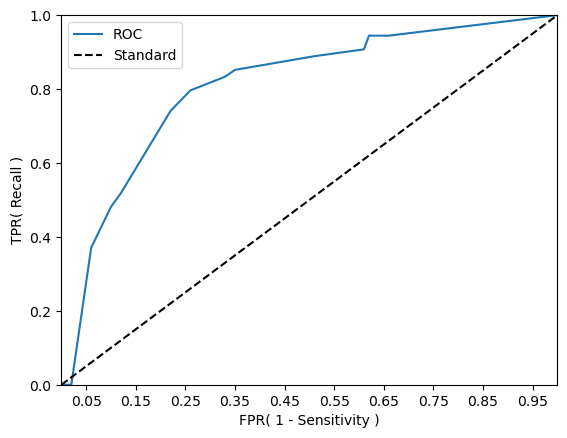

In [39]:
def roc_curve_plot(y_test , prediction_proba_class1):
#     임계값에 따른 FPR, TPR 값
    fprs, tprs, thresholds = roc_curve(y_test ,prediction_proba_class1)

#     ROC Curve를 plot 곡선으로 그림. 
    plt.plot(fprs , tprs, label='ROC')
#     가운데 대각선 직선을 그림. 
#     TPR과 FPR이 동일한 비율로 떨어진다는 것은 모델이 양성과 음성을 구별하지 못한다는 것을 의미한다.
#     다른 분류기를 판단하기 위한 기준선으로 사용되며, 
#     대각선에 가까울 수록 예측에 사용하기 힘든 모델이라는 뜻이다.
    plt.plot([0, 1], [0, 1], 'k--', label='Standard')
    
    # X축(FPR)의 Scale을 0.1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    plt.xlim(0,1); plt.ylim(0,1)
    plt.xlabel('FPR( 1 - Sensitivity )'); plt.ylabel('TPR( Recall )')
    plt.legend()
    plt.show()
    
roc_curve_plot(y_test, grid_decision_tree.predict_proba(X_test)[:, 1] )

In [40]:
from sklearn.metrics import roc_auc_score

prediction_proba_class1 = grid_decision_tree.predict_proba(X_test)[:, 1]
binarizer = Binarizer(threshold=0.5)
prediction = binarizer.fit_transform(prediction_proba_class1.reshape(-1, 1))
roc_score = roc_auc_score(y_test, prediction)
print(f'ROC AUC 값: {np.round(roc_score, 4)}')

ROC AUC 값: 0.7681


##### 🚩정리

1. 여러 개의 임계값에 대한 정밀도와 재현율을 확인한다.
> precisions, recalls, thresholds = precision_recall_curve(y_test, prediction_proba_class1)

2. 위의 임계값에 대한 다양한 평가 지표를 확인한다.
> get_evaluation_by_thresholds(y_test, prediction_proba_class1.reshape(-1, 1), thresholds)

3. 원하는 임계값으로 설정하여 다시 한 번 다양한 평가 지표를 확인한다.
> prediction_proba = grid_decision_tree.predict_proba(X_test)[:, 1].reshape(-1, 1)
> prediction = Binarizer(threshold=0.52).fit_transform(prediction_proba)
> get_evaluation(y_test, prediction, grid_decision_tree, X_test)

4. 해당 임계값으로 설정된 모델의 prediction을 사용한다.

In [41]:
from sklearn.metrics import accuracy_score, precision_score , recall_score , confusion_matrix, ConfusionMatrixDisplay, f1_score, roc_auc_score
# 타겟 데이터와 예측 객체를 전달받는다.
def get_evaluation(y_test, prediction, classifier=None, X_test=None):
#     오차 행렬
    confusion = confusion_matrix(y_test, prediction)
#     정확도
    accuracy = accuracy_score(y_test , prediction)
#     정밀도
    precision = precision_score(y_test , prediction)
#     재현율
    recall = recall_score(y_test , prediction)
#     F1 score
    f1 = f1_score(y_test, prediction)
#     ROC-AUC
    roc_auc = roc_auc_score(y_test, prediction)

    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1:{3:.4f}, AUC:{4:.4f}'.format(accuracy , precision ,recall, f1, roc_auc))
    print("#" * 75)
    
    if classifier is not None and  X_test is not None:
        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8,4))
        titles_options = [("Confusion matrix", None), ("Normalized confusion matrix", "true")]

        for (title, normalize), ax in zip(titles_options, axes.flatten()):
            disp = ConfusionMatrixDisplay.from_estimator(classifier, X_test, y_test, ax=ax, cmap=plt.cm.Blues, normalize=normalize)
            disp.ax_.set_title(title)
        plt.show()

오차 행렬
[[74 26]
 [11 43]]
정확도: 0.7597, 정밀도: 0.6232, 재현율: 0.7963, F1:0.6992, AUC:0.7681
###########################################################################


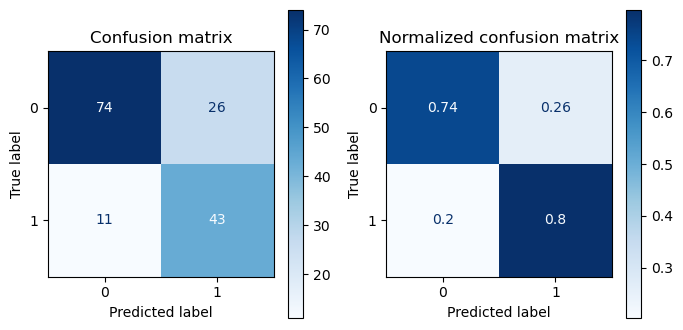

In [42]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

features, targets = diabetes_df.iloc[:, :-1], diabetes_df.Outcome

scaler = StandardScaler()
# fit()을 통해 대입하고, transform()을 통해 연산한다.
# 이를 fit_transform()으로 일괄처리한다.
features_scaled = scaler.fit_transform(features)

# stratify: 데이터를 나눌 때 타겟 데이터 분포 비율에 맞춰서 나눠준다.
# 한 쪽으로 치우치지 않도록 해주는 파라미터.
X_train, X_test, y_train, y_test = train_test_split(features_scaled, targets, test_size = 0.2, stratify=targets, random_state=256)

# 결정 트리 분류
decision_tree_classifier = DecisionTreeClassifier()
parameters = {'max_depth':[5, 6, 7], 'min_samples_split':[7, 8, 9]}

grid_decision_tree = GridSearchCV(decision_tree_classifier, param_grid=parameters, cv=10, refit=True, return_train_score=True)

grid_decision_tree.fit(X_train, y_train)

# default 임계값인 0.5를 사용한다면, 바로 예측한 결과를 평가 지표 함수들에 전달한다.
prediction = grid_decision_tree.predict(X_test)

# default 임계값이 아닌 수치 조정이 필요하다면, predict_proba를 사용한 뒤, Binarizer를 통해 조정한다.
prediction_proba = grid_decision_tree.predict_proba(X_test)[:, 1].reshape(-1, 1)
prediction = Binarizer(threshold=0.38).fit_transform(prediction_proba)
get_evaluation(y_test, prediction, grid_decision_tree, X_test)

### 피마 인디언 당뇨병 예측
- 이진 분류(Binary Classification)
##### Featuer
- Pregnancies : 임신 횟수
- Glucose : 경구 포도당 내성 시험에서 2시간 동안 혈장 포도당 농도
- BloodPressure : 혈압 (mm Hg)
- SkinThickness: 삼두근 피부 두께 (mm)
- Insulin: 2시간 혈청 인슐린 (mu U/ml)
- BMI: 체질량지수(kg/(height in m)<sup>2</sup>)
- DiabetesPedigreeFunction: 당뇨병 혈통 기능(유전)
- Age: 나이(만 나이)

##### Target(Label)
- Outcome: 클래스 변수 (0, 음성 또는 1, 양성) 268/768은 1이고 나머지는 0입니다

In [43]:
import pandas as pd
import matplotlib.pyplot as plt

diabetes_df = pd.read_csv('./datasets/pima_indians_diabetes.csv')

display(diabetes_df)
diabetes_df.info()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Text(0.5, 1.0, 'Correlation')

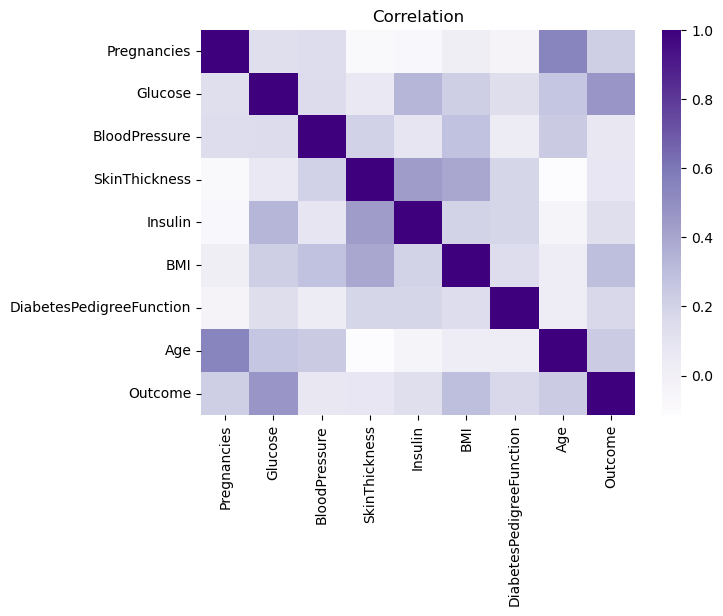

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = diabetes_df.corr()
fig = plt.figure(figsize=(7, 5))
heatmap = sns.heatmap(corr, cmap="Purples")
heatmap.set_title("Correlation")

In [45]:
corr.loc['Outcome'].sort_values(ascending=False)

Outcome                     1.000000
Glucose                     0.466581
BMI                         0.292695
Age                         0.238356
Pregnancies                 0.221898
DiabetesPedigreeFunction    0.173844
Insulin                     0.130548
SkinThickness               0.074752
BloodPressure               0.065068
Name: Outcome, dtype: float64

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\categorical.py:1296: UserWarning: 54.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\categorical.py:1296: UserWarning: 50.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\categorical.py:1296: UserWarning: 28.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\categorical.py:1296: UserWarning: 45.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\categorical.py:1296: UserWarning: 37.5% of the points

<Axes: xlabel='Age', ylabel='Glucose'>

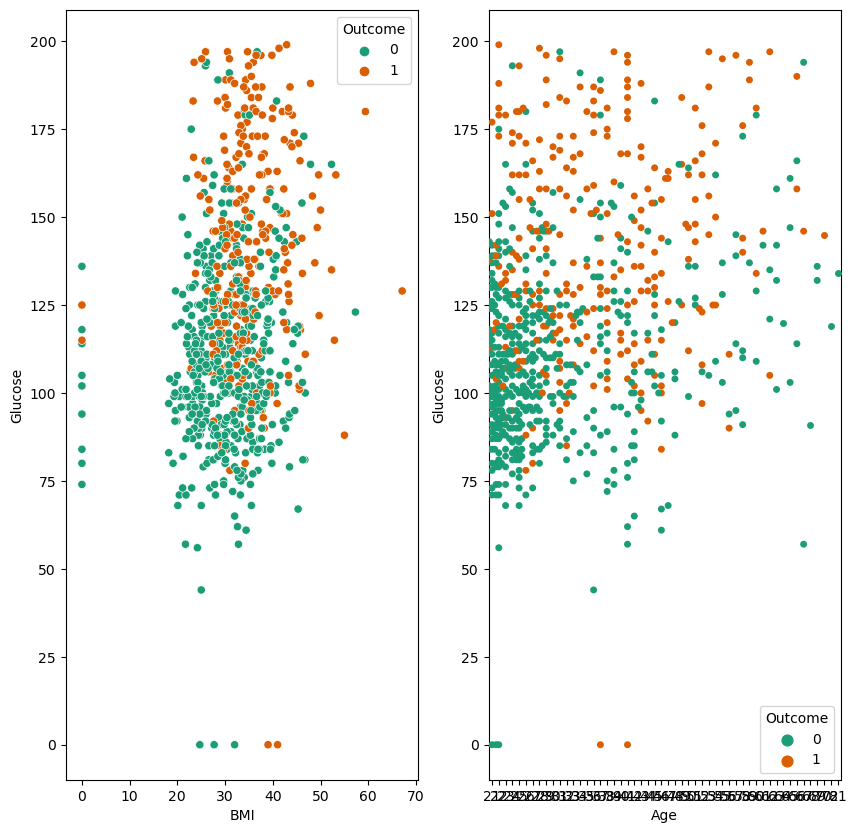

In [46]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 10))
sns.scatterplot(x="BMI", y="Glucose", hue="Outcome",
              palette="Dark2", data=diabetes_df, ax=ax1)
sns.swarmplot(x="Age", y="Glucose", hue="Outcome",
              palette="Dark2", data=diabetes_df, ax=ax2)

##### SVC(Support Vector Classifier) 하이퍼 파라미터 튜닝
##### 출처: https://amueller.github.io/aml/02-supervised-learning/07-support-vector-machines.html
- SVC는 gamma와 C를 조절하여 튜닝한다.
- gamma는 하나의 훈련 샘플이 미치는 영향의 범위를 결정한다.
- C는 패널티를 조절할 수 있고, 값이 커질수록 결정 경계가 데이터에 더 정확하게 맞춰진다.

In [47]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import Normalizer
from sklearn.pipeline import Pipeline

# C: 하드 마진, 소프트 마진
# gamma: 하나의 훈련 샘플이 미치는 영향의 범위
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'gamma': [0.001, 0.01, 0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf']
}

# 서포트 벡터 분류
support_vector_classifier = SVC(probability=True)

# 하이퍼 파라미터 튜닝
grid_support_vector = GridSearchCV(support_vector_classifier, param_grid=param_grid, cv=3, refit=True, return_train_score=True)

features, targets = diabetes_df.iloc[:, :-1], diabetes_df.Outcome

scaler = StandardScaler()
# fit()을 통해 대입하고, transform()을 통해 연산한다.
# 이를 fit_transform()으로 일괄처리한다.
features_scaled = scaler.fit_transform(features)

X_train, X_test, y_train, y_test = train_test_split(features_scaled, targets, stratify=targets, test_size=0.3)

sv_pipeline = Pipeline([('normalizer', Normalizer()), ('support_vector_classifier', grid_support_vector)])
sv_pipeline.fit(X_train, y_train)

Pipeline(steps=[('normalizer', Normalizer()),
                ('support_vector_classifier',
                 GridSearchCV(cv=3, estimator=SVC(probability=True),
                              param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                                          'gamma': [0.001, 0.01, 0.1, 1, 10,
                                                    100],
                                          'kernel': ['linear', 'rbf']},
                              return_train_score=True))])

In [48]:
# DataFrame으로 변환
scores_df = pd.DataFrame(grid_support_vector.cv_results_)
scores_df[['params', 'mean_test_score', 'rank_test_score', 
           'split0_test_score', 'split1_test_score', 'split2_test_score']].sort_values(by='rank_test_score')

,params,mean_test_score,rank_test_score,split0_test_score,split1_test_score,split2_test_score
41,"{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}",0.763501,1,0.770950,0.726257,0.793296
51,"{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}",0.761639,2,0.776536,0.720670,0.787709
61,"{'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}",0.761639,2,0.776536,0.726257,0.782123
24,"{'C': 0.1, 'gamma': 0.001, 'kernel': 'linear'}",0.757914,4,0.770950,0.720670,0.782123
28,"{'C': 0.1, 'gamma': 0.1, 'kernel': 'linear'}",0.757914,4,0.770950,0.720670,0.782123
...,...,...,...,...,...,...
29,"{'C': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}",0.651769,38,0.648045,0.653631,0.653631
33,"{'C': 0.1, 'gamma': 10, 'kernel': 'rbf'}",0.651769,38,0.648045,0.653631,0.653631
14,"{'C': 0.01, 'gamma': 0.01, 'kernel': 'linear'}",0.651769,38,0.648045,0.653631,0.653631
59,"{'C': 10, 'gamma': 100, 'kernel': 'rbf'}",0.649907,71,0.648045,0.653631,0.648045


In [49]:
from sklearn.metrics import accuracy_score, precision_score , recall_score , confusion_matrix, ConfusionMatrixDisplay, f1_score, roc_auc_score
import matplotlib.pyplot as plt
# 타겟 데이터와 예측 객체를 전달받는다.
def get_evaluation(y_test, prediction, classifier=None, X_test=None):
#     오차 행렬
    confusion = confusion_matrix(y_test, prediction)
#     정확도
    accuracy = accuracy_score(y_test , prediction)
#     정밀도
    precision = precision_score(y_test , prediction, average='macro')
#     재현율
    recall = recall_score(y_test , prediction, average='macro')
#     F1 score
    f1 = f1_score(y_test, prediction, average='macro')
#     ROC-AUC : 연구 대상
    roc_auc = roc_auc_score(y_test, prediction)

    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1:{3:.4f}, ROC-AUC:{4:.4f}'.format(accuracy , precision ,recall, f1, roc_auc))
    print("#" * 75)
    
    if classifier is not None and  X_test is not None:
        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8,4))
        titles_options = [("Confusion matrix", None), ("Normalized confusion matrix", "true")]

        for (title, normalize), ax in zip(titles_options, axes.flatten()):
            disp = ConfusionMatrixDisplay.from_estimator(classifier, X_test, y_test, ax=ax, cmap=plt.cm.Blues, normalize=normalize)
            disp.ax_.set_title(title)
        plt.show()

In [50]:
prediction = sv_pipeline.predict(X_test)
get_evaluation(y_test, prediction)

오차 행렬
[[139  11]
 [ 39  42]]
정확도: 0.7835, 정밀도: 0.7867, 재현율: 0.7226, F1:0.7372, ROC-AUC:0.7226
###########################################################################
